# MTH9879 Homework 4 Yixiang Wang

Assigned: March 8, 2016.
Due: March 22, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\underbar}{\underline}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) and Jim Gatheral (jim.gatheral@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact Yuxi Liu, who has kindly offered to help.


### 0. (0 points) 
Read Chapter 5 and 6 of Hasbrouck and Chapters 2 and 3 of Foucault, Pagano and R&ouml;ell. 


## Glosten and Milgrom

### 1. (8 points) 

(Adapted from Hasbrouck 5.2 but please note that the setup in (3) in the slides is different from Hasbrouck's in Figure 5.1 of his book.) Consider a variant of the Glosten and Milgrom model where there is informed trading only in the low state $V=\underline V$.

(a) Show that the learned probability after one step that the true price is $\bar V$ is given by

$$
\delta_1(Buy)=\Pr(\bar V|Buy)=\frac{\delta}{1-\mu\,(1-\delta)};\quad \delta_1(Sell)=\Pr(\bar V|Sell)=\frac{\delta}{1+\mu\,(1-\delta)}
$$

and that

$$
A=\frac{\underline V\,{(1-\delta)\,(1-\mu)}+\bar V\,{\delta}}{{1-\mu\,(1-\delta)}};\quad B=\frac{\underline V\,{(1-\delta)\,(1+\mu)}+\bar V\,{\delta}}{1+\mu\,(1-\delta)}
$$


>ANSWER:

>$\delta_1(BUY)$

>$=P(\bar V and BUY)/P(BUY)$

>$=(1/2\delta)/[1/2[1-\mu \times (1-\mu)]$

>$=\delta/(0.5\times (1-\mu(1-\delta)))$

>$=\frac{\delta}{1-\mu(1-\delta)}$

>Similarly, we have:

>$\delta_1(BUY)=\frac{\delta}{1+\mu(1-\delta)}$

>Also:

>$A=E(V|BUY)=\bar V \times P(\bar V| NUY) + \underline V \times P(\underline V| BUY)$

>$=\frac{\underline V (1-\delta)(1-\mu)+\bar V \delta}{1-\mu(1-\delta)}$

>Similarly, we have:

>$B=\frac{\underline V\,{(1-\delta)\,(1+\mu)}+\bar V\,{\delta}}{1+\mu\,(1-\delta)}$

(b) Deduce an expression for the spread $s=A-B$.

> ANSWER:

>From (a), we can easily derive that:

>$s=A-B$

>$=\frac{\underline V (1-\delta)(1-\mu)+\bar V \delta}{1-\mu(1-\delta)}-\frac{\underline V\,{(1-\delta)\,(1+\mu)}+\bar V\,{\delta}}{1+\mu\,(1-\delta)}$

>$=\frac{2 (\bar V - \underline V)\times \mu \times \delta \times (1-\delta)}{1-\mu ^2 (1-\delta) ^2}$

(c) Explain the sensitivities of the spread to the parameters of the model to a non-expert.


### Load data and R packages for the next questions

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")

In [5]:
load('tq.rData')
library(highfrequency)
library(xts)

ERROR: Error in library(highfrequency): there is no package called ‘highfrequency’


## The Lee and Ready tick test

### 2. (10 points) 

In the following use the trades and quotes object *tqBAC* in the loaded data *tq.rData*.  Denote trade prices by $p_t$ and mid-quotes by $m_t$.

(a) Compute the time series of trade signs $\epsilon_t$ according to $\epsilon_t=+1$ if $p_t>m_t$ and  $\epsilon_t=-1$ otherwise, using the Lee-Ready rule for trades at mid.  Name this series *tradeSigns*. (Note this was already done in the lecture.)

In [12]:
#check if some necessary packages are installed
#if not, install them
options(repos=structure(c(CRAN="http://cran.at.r-project.org/")))
list.of.packages <- c("highfrequency","quantmod")
new.packages <- 
list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)
#include the libraries
library(highfrequency)
library(quantmod)


Attaching package: ‘highfrequency’

The following objects are masked from ‘package:quantmod’:

    getPrice, has.Qty



In [13]:
tradeSigns = getTradeDirection(tqBAC) #convert to trade sign series

(b) Compute the Lee-Ready trade-sign indicator time series (as if you didn't have quotes and so no mid-prices).

In [16]:
px = as.numeric(tqBAC$PRICE)
ind= rep(0,length(px)-1)
ind[1] = 1
for(n in 2:len_price){
    if (px[n] > px[n-1])ind[n-1] = 1
    else if (px[n] < px[n-1])ind[n-1] = -1
    else ind[n-1] = ind[n-2]}

(c) Compute the correlation of these two indicators.

In [18]:
cor(ind, tradeSigns[-1])

[1] 0.6618357

(d) Assume the rule in part (a) is 100% accurate.  What percentage of trades are correctly signed by the Lee-Ready test?

In [21]:
accuracy = 0
for (i in 1:(length(px)-1)){
    if (ind[i]==tradeSigns[i+1]) accuracy = accuracy+1/(length(px)-1.0)}
accuracy

[1] 0.8297026

(e) Explain the relationship between your answers in (c) and (d).

>ANSWER:

>From (c) and (d), we can conclude that higher correlation indicating higher accuracy

## Realized spread by exchange

### 3. (8 points)

(a) Reproduce Figure 6 from the lecture slides, making sure to get the aesthetics right.

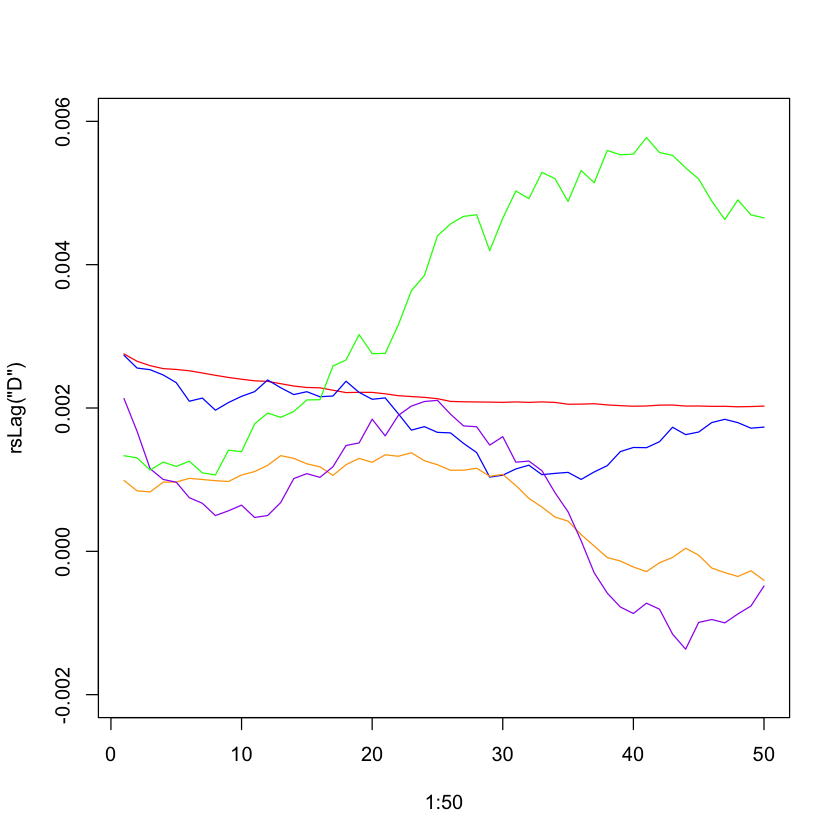

In [49]:
lamda_helper <- function(lag,px,Sig,mids){
    return (mean(Sig[1:(length(px)-lag)]*(px[1:(length(px)-lag)]-mids[-(1:lag)])) )
}
rsLag <- function(input_ex) {
    #take the subset
    temp = subset(tqBAC, tqBAC$EX==input_ex)
    middle = (as.numeric(temp$OFR) + as.numeric(temp$BID))/2.0
    px = as.numeric(temp$PRICE)#change the price format
    tradeSigns = getTradeDirection(temp)#convert to trading directions
    lamda<-function(lag){lamda_helper(lag,px,tradeSigns,middle)}#create lamda
    return (sapply(1:50,lamda))}

plot(1:50,rsLag('D'),col='red', ylim=c(-0.002, 0.006),type='l')
lines(1:50,rsLag('B'),col='blue')
lines(1:50,rsLag('Z'),col='orange')
lines(1:50,rsLag('Y'),col='purple')
lines(1:50,rsLag('P'),col='green')

(b) Explain why the realized spread profile varies by exchange.

>ANSWER:

(c) Redo the picture adjusting for the following (assumed) take fees:

** Exchange ** | ** Take fee ** 
--- | --- 
| (**cents**)
D | 0.10 
B | -0.04
Z | 0.29
Y | 0.00
P | 0.25

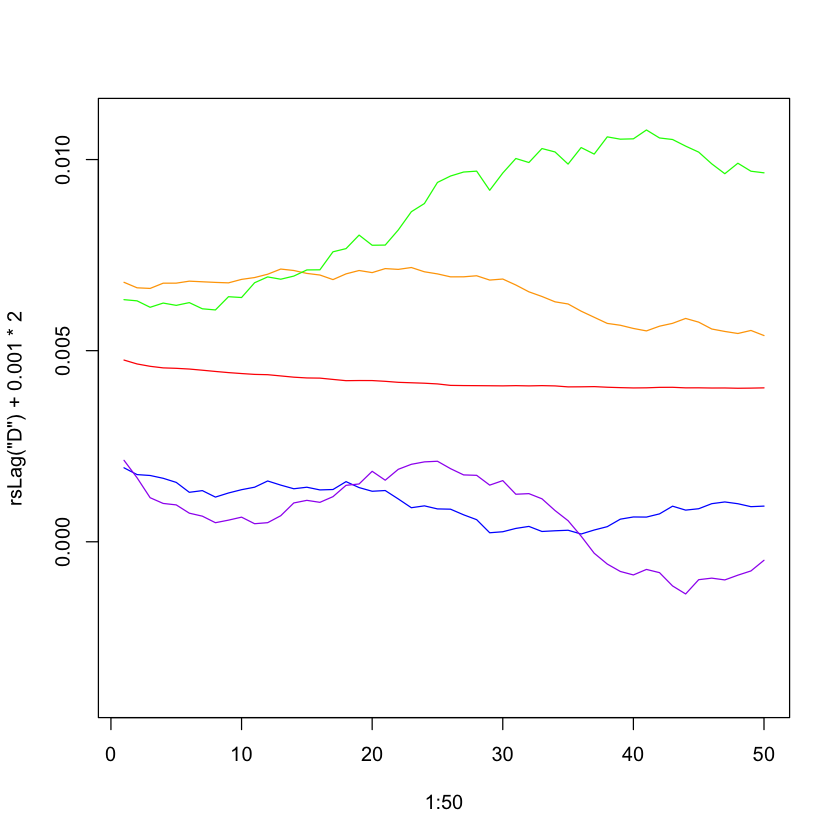

In [47]:
plot(1:50,rsLag('D')+0.001*2,col="red",ylim=c(-0.004, 0.011),type="l")
lines(1:50,rsLag('B')-0.0004*2,col="blue")
lines(1:50,rsLag('Z')+0.0029*2,col="orange")
lines(1:50,rsLag('Y'),col="purple")
lines(1:50,rsLag('P')+0.0025*2,col="green")

(d) Based on your results, where would you advise sending a small market order?  How about a large one?

>ANSWER:

## Predicting trade signs

### 4. (6 points) 

The following require the *tradeSigns* series from Problem 2.

(a) Denote the probability of a sign reversal by $\pi$.  Derive an expression in terms of $\pi$ for the conditional expectation $\E[\epsilon_t|\epsilon_{t-1}]$.

(b) Assume zero expectation of the trading signs, fit an AR(1) model to the series *tradeSigns*.  What is the coefficient returned by this model?  Explain how  this coefficient relates to $\pi$?

In [55]:
lm(tradeSigns[1:(length(tradeSigns)-1)] ~ tradeSigns[2:length(tradeSigns)]-1)


Call:
lm(formula = tradeSigns[1:(length(tradeSigns) - 1)] ~ tradeSigns[2:length(tradeSigns)] - 
    1)

Coefficients:
tradeSigns[2:length(tradeSigns)]  
                         0.08473  


## The MRR model

### 5. (6 points)
Using the estimate of $\rho$ (the coefficient obtained from fitting to an AR(1) model) from Problem 4 and equation (11) from the lecture slides:

$$
\Delta p_t=(\phi+\lambda)\,\epsilon_t-(\phi+\rho\,\lambda)\,\epsilon_{t-1}+e_t+\Delta \xi_t
$$

estimate by linear regression the MRR parameters $\phi$ (transaction cost) and $\lambda$ (adverse selection or "Kyle lambda") from  *tqBAC*.  This amounts to ignoring the autocorrelation of the $\Delta \xi_t$.
<br>

Hint: Use the R function *lm*  to perform the linear regressions.

In [60]:
lm(px[2:length(px)]-px[1:(length(px)-1)] ~ tradeSigns[1:(length(tradeSigns)-1)]+tradeSigns[2:length(tradeSigns)])


Call:
lm(formula = px[2:length(px)] - px[1:(length(px) - 1)] ~ tradeSigns[1:(length(tradeSigns) - 
    1)] + tradeSigns[2:length(tradeSigns)])

Coefficients:
                           (Intercept)  tradeSigns[1:(length(tradeSigns) - 1)]  
                            -4.025e-05                              -2.337e-03  
      tradeSigns[2:length(tradeSigns)]  
                             2.877e-03  


>ANSWER:

>$\phi+\lambda=-2.337e-03$

>$-(\phi+\rho\lambda)=2.877e-03$

>which implies that:

>$\phi=−0.00292489$

>$$